In [1]:
import pandas as pd
df=pd.read_csv("FinalAdalab - anemia (1).csv")

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [3]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result,Type
0,1,14.9,22.7,29.1,83.7,0,Normocytic
1,0,15.9,25.4,28.3,72.0,0,Microcytic
2,0,9.0,21.5,29.6,71.2,1,Microcytic
3,0,14.9,16.0,31.4,87.5,0,Normocytic
4,1,14.7,22.0,28.2,99.5,0,Normocytic


In [4]:
df.shape

(16721, 7)

In [5]:
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
Type          0
dtype: int64

In [6]:
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,16721.000000,16721.000000,16721.000000,16721.000000,16721.000000,16721.000000
mean,0.338556,12.834874,26.995606,32.532711,83.603615,0.394414
std,0.473233,2.094679,3.658056,2.127328,7.783910,0.488739
min,0.000000,2.990000,12.550000,18.070000,49.930000,0.000000
25%,0.000000,11.600000,25.390000,31.500000,79.700000,0.000000
50%,0.000000,12.880000,27.770000,32.700000,84.400000,0.000000
75%,1.000000,14.190000,29.300000,33.700000,88.200000,1.000000
max,1.000000,22.450000,139.000000,168.000000,125.300000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

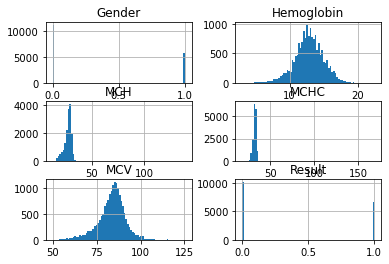

In [7]:
df.hist(bins=80)
plt.show

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16721 entries, 0 to 16720
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      16721 non-null  int64  
 1   Hemoglobin  16721 non-null  float64
 2   MCH         16721 non-null  float64
 3   MCHC        16721 non-null  float64
 4   MCV         16721 non-null  float64
 5   Result      16721 non-null  int64  
 6   Type        16721 non-null  object 
dtypes: float64(4), int64(2), object(1)
memory usage: 914.6+ KB


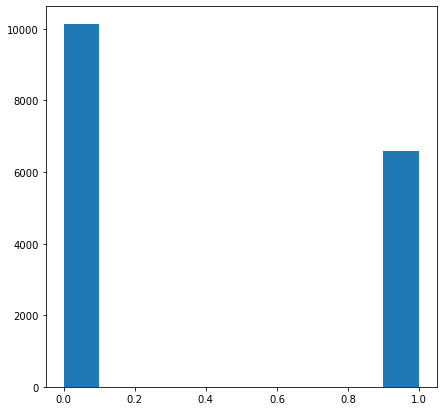

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.hist(df.Result)
plt.show()

In [10]:
col =  list(df["Result"])
str=[]
str2=[]
for i in col:
    if i not in str:
        str.append(i)
for i in range(0,len(str)):
    str2.append(col.count(str[i]))
str2 

[10126, 6595]

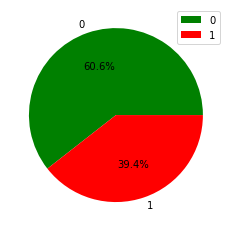

In [11]:
plt.pie(str2,labels=str,colors=["green","red","blue"],autopct='%1.1f%%')
plt.legend()

In [3]:
x=df.drop("Result",axis=1)
X=x.drop("Type",axis=1)
y=df["Result"]

In [4]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [5]:
scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_norm=scaler.fit_transform(X)

In [6]:
X_norm

array([[1.        , 0.61202467, 0.08026888, 0.07356766, 0.44805626],
       [0.        , 0.66341213, 0.10162119, 0.06823184, 0.29282208],
       [0.        , 0.30883864, 0.07077896, 0.07690255, 0.28220777],
       ...,
       [0.        , 0.55035971, 0.1198102 , 0.10158074, 0.44142232],
       [0.        , 0.46813977, 0.11427442, 0.0875742 , 0.4865331 ],
       [0.        , 0.55549846, 0.12930012, 0.10891749, 0.45070983]])

In [7]:
smote = SMOTE()
X_r, y_r = smote.fit_resample(X_norm, y)

In [8]:
col =  list(y_r)
str=[]
str2=[]
for i in col:
    if i not in str:
        str.append(i)
for i in range(0,len(str)):
    str2.append(col.count(str[i]))
str2 

[10126, 10126]

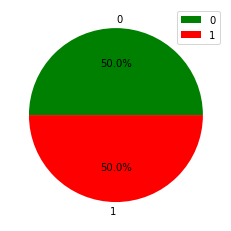

In [9]:
plt.pie(str2,labels=str,colors=["green","red","blue"],autopct='%1.1f%%')
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

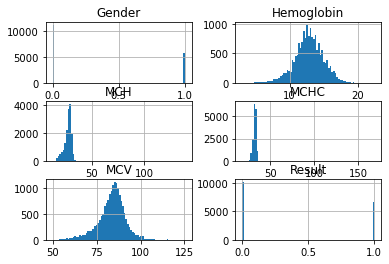

In [10]:
df.hist(bins=80)
plt.show

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X_r,y_r,test_size=0.3,random_state=25)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14176, 5), (6076, 5), (14176,), (6076,))

### Logistic Regression

In [15]:
import time
from sklearn.linear_model import LogisticRegression
m=LogisticRegression()
m1=m.fit(X_train,y_train)

In [16]:
y_act=m1.predict(X_train) #Predicting the value
y_pre=m1.predict(X_test)

In [17]:
print("Training Accuracy : ",accuracy_score(y_act,y_train))
print("Testing Accuracy : ",accuracy_score(y_pre,y_test))

Training Accuracy :  0.9840575620767494
Testing Accuracy :  0.9815668202764977


In [20]:
p=precision_score(y_pre,y_test)
p

1.0

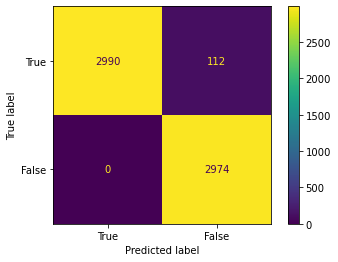

In [22]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_pre)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True,False])
cm_display.plot()
plt.show()

In [32]:
##Stratified k-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=15)
model=LogisticRegression()
scores=cross_val_score(model,X_r,y_r,cv=skfold)
print(scores)

[0.98223538 0.97631384 0.98962963 0.97333333 0.96148148 0.96888889
 0.98814815 0.99777778 0.98518519 0.9562963  0.98518519 0.9837037
 0.96222222 0.9837037  0.98740741]


In [33]:
np.mean(scores)

0.9787674790507259

### SVM

In [25]:
from sklearn.svm import SVC

In [27]:
from sklearn import svm
model=svm.SVC(kernel='rbf')
model.fit(X_train,y_train)
y_te_pred=model.predict(X_test)
y_act=model.predict(X_train)
print("Training Accuracy:",accuracy_score(y_train,y_act))
print("Testing Accuracy : ",accuracy_score(y_test,y_te_pred))


Training Accuracy: 0.9857505643340858
Testing Accuracy :  0.9851876234364714


In [28]:
#Precision score
from sklearn.metrics import precision_score
p=precision_score(y_test,y_te_pred, labels=None, pos_label=1, average='weighted', sample_weight=None, zero_division='warn')
p

0.9856227128263922

In [29]:
#Recall score
from sklearn.metrics import recall_score 
r=recall_score(y_test,y_te_pred,labels=None,pos_label=1,average='micro',sample_weight=None,zero_division='warn')
r

0.9851876234364714

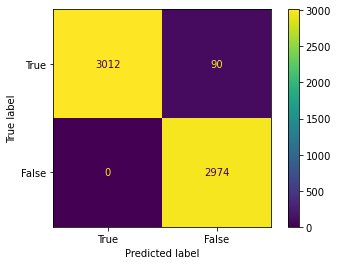

In [30]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_te_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True,False])
cm_display.plot()
plt.show()

In [36]:
##Stratified k-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=15)
model=svm.SVC()
scores=cross_val_score(model,X_r,y_r,cv=skfold)
print(scores)

[0.98593634 0.98223538 0.99185185 0.97407407 0.97037037 0.97407407
 0.98296296 0.99777778 0.99037037 0.92222222 0.9837037  0.98518519
 0.96518519 0.99481481 0.99111111]


In [37]:
np.mean(scores)

0.9794583618901408

In [80]:
from sklearn.svm import NuSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


st=time.time()

# Train model
model = NuSVC(nu=0.5, kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
et=time.time()
et-st

Accuracy: 0.8999402033087502


11.412858247756958

### LOG+SVM

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel


logistic_svm = Pipeline([
    ('feature_selection', SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear'))),
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=11, gamma=0.3))
])

# Train the hybrid model on the training set
logistic_svm.fit(X_train, y_train)

# Evaluate the hybrid model on the testing set
score = logistic_svm.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(score * 100))

C:\Users\Shweta\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 99.85%


### DEcision trees

In [40]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_act=model.predict(X_train)
y_te_pred=model.predict(X_test)

In [42]:
#Accuracy
print("Training accuracy", accuracy_score(y_train,y_act))
print("Testing Accuracy : ",accuracy_score(y_test,y_te_pred))

Training accuracy 0.9857505643340858
Testing Accuracy :  1.0


In [43]:
#Precision score
from sklearn.metrics import precision_score
p=precision_score(y_test,y_te_pred, labels=None, pos_label=1, average='weighted', sample_weight=None, zero_division='warn')
p

1.0

In [44]:
#Precision score
from sklearn.metrics import recall_score
r=recall_score(y_test,y_te_pred, labels=None, pos_label=1, average='weighted', sample_weight=None, zero_division='warn')
r

1.0

In [45]:
##Stratified k-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model=DecisionTreeClassifier()
scores=cross_val_score(model,X,y,cv=skfold)
print(scores)

[1.         1.         1.         1.         0.98654306]


In [46]:
np.mean(scores)


0.9973086124401913

In [47]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_te_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3102
           1       1.00      1.00      1.00      2974

    accuracy                           1.00      6076
   macro avg       1.00      1.00      1.00      6076
weighted avg       1.00      1.00      1.00      6076



In [48]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_train,y_act))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      7024
           1       0.97      1.00      0.99      7152

    accuracy                           0.99     14176
   macro avg       0.99      0.99      0.99     14176
weighted avg       0.99      0.99      0.99     14176



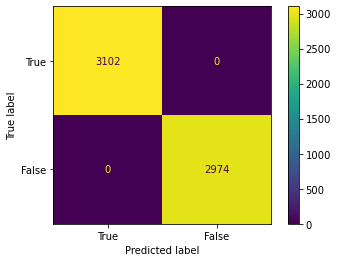

In [49]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_te_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True,False])
cm_display.plot()
plt.show()

### Random Forest

In [51]:
st=time.time()
from sklearn.ensemble import RandomForestClassifier 
m= RandomForestClassifier(n_estimators=10)
m1=m.fit(X_train,y_train)
y_act=m1.predict(X_train) #Predicting the value
y_pre=m1.predict(X_test)
print("Training Accuracy : ",accuracy_score(y_act,y_train))
print("Testing Accuracy : ",accuracy_score(y_pre,y_test))

Training Accuracy :  1.0
Testing Accuracy :  0.9996013553916683


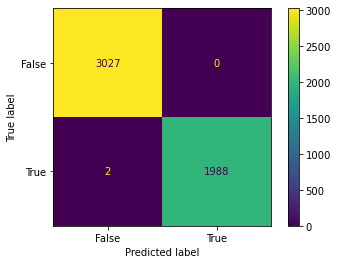

In [52]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_pre)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_act=knn.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
acc=accuracy_score(y_train,y_act)
print(" Training Accuracy:", acc)
print(" Testing Accuracy:", accuracy)

 Training Accuracy: 0.9849624060150376
 Testing Accuracy: 0.9609328283834961


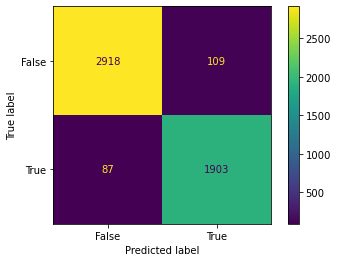

In [82]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Nb

In [83]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
y_act=nb.predict(X_train)
# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Training accuray",accuracy_score(y_train,y_act))
print(f"Accuracy: {accuracy}")


Training accuray 0.8353554340396445
Accuracy: 0.8339645206298585


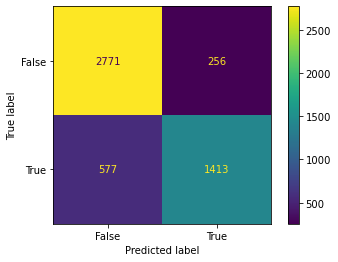

In [84]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Linear Discriminant Analysis

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
LDA_pred=LDA.predict(X_test)
y_act=LDA.predict(X_train)
print("Training",accuracy_score(y_train,y_act))
print(accuracy_score(y_test,LDA_pred))

Training 0.9476247436773753
0.9515646800877018


### Quadratic Discriminant Analysis

In [62]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train,y_train)
QDA_pred=QDA.predict(X_test)
y_act=QDA.predict(X_train)
print("Training",accuracy_score(y_train,y_act))
print(accuracy_score(y_test,QDA_pred))

Training 0.917634996582365
0.9180785329878414


### ANN

In [63]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: gast<=0.4.0,>=0.2.1 in c:\users\shweta\anaconda3\lib\site-packages (from tensorflow-intel==2.11.0->tensorflow) (0.4.0)



In [64]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [65]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [66]:
classifier = Sequential()

In [67]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(8,input_shape=(5,),activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(3,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
366/366 [==============================] - 2s 2ms/step - loss: 1.3362 - accuracy: 0.6445
Epoch 2/50
366/366 [==============================] - 1s 1ms/step - loss: 0.6050 - accuracy: 0.6708
Epoch 3/50
366/366 [==============================] - 0s 1ms/step - loss: 0.5752 - accuracy: 0.6936
Epoch 4/50
366/366 [==============================] - 0s 1ms/step - loss: 0.5357 - accuracy: 0.7358
Epoch 5/50
366/366 [==============================] - 0s 1ms/step - loss: 0.4935 - accuracy: 0.7745
Epoch 6/50
366/366 [==============================] - 0s 1ms/step - loss: 0.4495 - accuracy: 0.8132
Epoch 7/50
366/366 [==============================] - 0s 1ms/step - loss: 0.4053 - accuracy: 0.8506
Epoch 8/50
366/366 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8848
Epoch 9/50
366/366 [==============================] - 0s 1ms/step - loss: 0.3129 - accuracy: 0.9082
Epoch 10/50
366/366 [==============================] - 0s 1ms/step - loss: 0.2758 - accuracy: 0.9268

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3027
           1       0.85      0.71      0.77      1990

    accuracy                           0.83      5017
   macro avg       0.84      0.81      0.82      5017
weighted avg       0.84      0.83      0.83      5017



<AxesSubplot:>

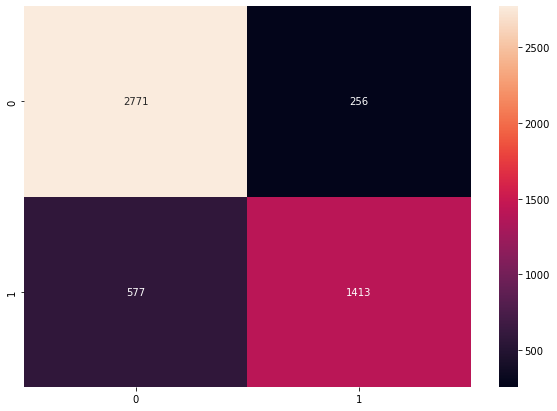

In [69]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')

### SVM and ANN

In [70]:
import numpy as np
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
ann.fit(X_train, y_train)

svm_preds = svm.predict(X_test)
ann_preds = ann.predict(X_test)


combined_preds = np.round((svm_preds + ann_preds) / 2)


accuracy = np.mean(combined_preds == y_test)
print("Accuracy of the combined SVM and ANN model: {:.2f}%".format(accuracy * 100))


Accuracy of the combined SVM and ANN model: 98.25%


### Ensemble

### Voting

In [86]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
st=time.time()

rf_model = DecisionTreeClassifier()
svm_model = SVC(kernel='linear', probability=True)
logreg_model = LogisticRegression(max_iter=175)
nn_model = MLPClassifier(hidden_layer_sizes=(7,2), activation='relu')


ensemble_model = VotingClassifier(estimators=[('rf', rf_model), ('svm', svm_model),
                                               ('logreg', logreg_model), ('nn', nn_model)],
                                   voting='hard')


ensemble_model.fit(X_train, y_train)


ensemble_predictions = ensemble_model.predict(X_test)

accuracy = accuracy_score(y_test, ensemble_predictions)
print(accuracy)
et=time.time()
et-st


0.998804066175005


2.62447452545166

### Boosting

### Adaboost

In [77]:
from sklearn.ensemble import AdaBoostClassifier
st=time.time()
base_model = LogisticRegression()

# Create AdaBoost classifier
n_estimators = 50  # Number of boosting stages
learning_rate = 0.1  # Learning rate for each stage
adaboost_model = AdaBoostClassifier( n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)

# Train the AdaBoost classifier
adaboost_model.fit(X_train, y_train)

# Predict using the trained AdaBoost classifier
y_pred_train = adaboost_model.predict(X_train)
y_pred_test = adaboost_model.predict(X_test)
# Evaluate the performance of the AdaBoost classifier
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
et=time.time()
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
et-st


Train accuracy: 1.0000
Test accuracy: 1.0000


0.44948816299438477

### Xgboost

In [76]:
import xgboost as xgb
st=time.time()
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eta': 0.1,  # Learning rate
    'max_depth': 3,  # Maximum depth of each tree
    'subsample': 0.8,  # Subsample ratio for each tree
    'random_state': 42  # Random seed for reproducibility
}
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

# Predict on test data
y_pred = model.predict(dtest)
# Convert predicted probabilities to binary labels
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
et=time.time()
print('Accuracy:', accuracy)
et-st

Accuracy: 1.0


0.24043655395507812

In [85]:
# Train the models
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

svm = SVC()
svm.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

nb = GaussianNB()
nb.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

ann = MLPClassifier()
ann.fit(X_train, y_train)

# Make predictions
logreg_pred = logreg.predict(X_test)
svm_pred = svm.predict(X_test)
knn_pred = knn.predict(X_test)
nb_pred = nb.predict(X_test)
rf_pred = rf.predict(X_test)
ann_pred = ann.predict(X_test)

# Combine predictions using hard voting
final_pred = []
for i in range(len(X_test)):
    pred = [logreg_pred[i], svm_pred[i], knn_pred[i], nb_pred[i], rf_pred[i], ann_pred[i]]
    final_pred.append(max(set(pred), key = pred.count))

# Evaluate the performance of the ensemble model
accuracy = accuracy_score(y_test, final_pred)


C:\Users\Shweta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Shweta\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [128]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


rf_model = DecisionTreeClassifier()
svm_model = SVC(kernel='linear', probability=True)
logreg_model = LogisticRegression(max_iter=100)
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu')


ensemble_model = BaggingClassifier(base_estimator=LogisticRegression(),
                                    n_estimators=40, max_samples=0.7, max_features=0.5)


ensemble_model.fit(X_train, y_train)


ensemble_predictions = ensemble_model.predict(X_test)

accuracy = accuracy_score(y_test, ensemble_predictions)
accuracy

C:\Users\Shweta\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9178792106836755